In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import numpy as np

In [30]:
df = pd.read_csv('iris.csv')

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df = df[df['species'] != 0][['sepal_width', 'petal_length', 'species']]

In [35]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [36]:
df.shape

(100, 3)

In [37]:
# taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(10)

In [38]:
df_train

,sepal_width,petal_length,species
105,3.0,6.6,2
140,3.1,5.6,2
106,2.5,4.5,2
136,3.4,5.6,2
53,2.3,4.0,1
142,2.7,5.1,2
109,3.6,6.1,2
127,3.0,4.9,2
56,3.3,4.7,1
113,2.5,5.0,2


In [39]:
df_test

,sepal_width,petal_length,species
87,2.3,4.4,1
83,2.7,5.1,1
120,3.2,5.7,2
70,3.2,4.8,1
98,2.5,3.0,1
148,3.4,5.4,2
68,2.2,4.5,1
130,2.8,6.1,2
147,3.0,5.2,2
125,3.2,6.0,2


In [40]:
df_val

,sepal_width,petal_length,species
100,3.3,6.0,2
101,2.7,5.1,2
107,2.9,6.3,2
58,2.9,4.6,1
143,3.2,5.9,2


In [41]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

## Case1 - Bagging

In [42]:
# data for tree 1
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
136,3.4,5.6,2
56,3.3,4.7,1
106,2.5,4.5,2
53,2.3,4.0,1
136,3.4,5.6,2
109,3.6,6.1,2
127,3.0,4.9,2
127,3.0,4.9,2


In [43]:
dt_bag1 = DecisionTreeClassifier()

In [44]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

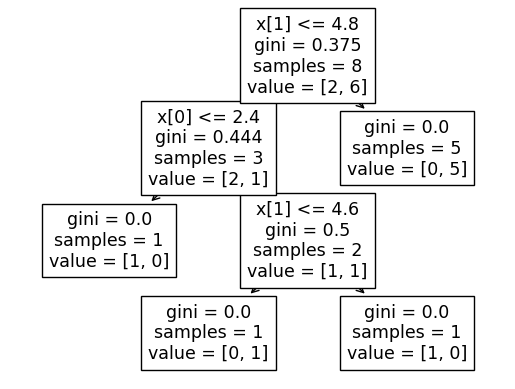

C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


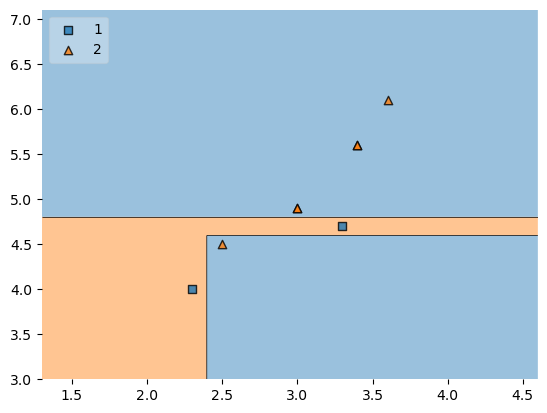

In [45]:
evaluate(dt_bag1,X,y)

In [46]:
# data for tree 2
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
140,3.1,5.6,2
136,3.4,5.6,2
140,3.1,5.6,2
106,2.5,4.5,2
56,3.3,4.7,1
53,2.3,4.0,1
140,3.1,5.6,2
53,2.3,4.0,1


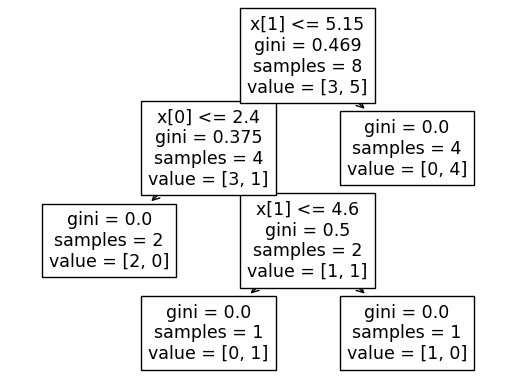

C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


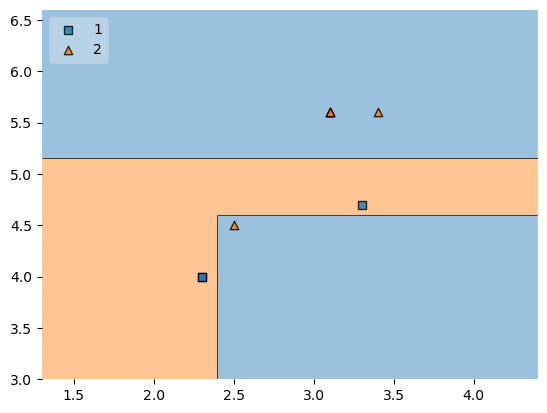

In [47]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [48]:
# data for tree 3
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
136,3.4,5.6,2
106,2.5,4.5,2
56,3.3,4.7,1
140,3.1,5.6,2
127,3.0,4.9,2
53,2.3,4.0,1
142,2.7,5.1,2
105,3.0,6.6,2


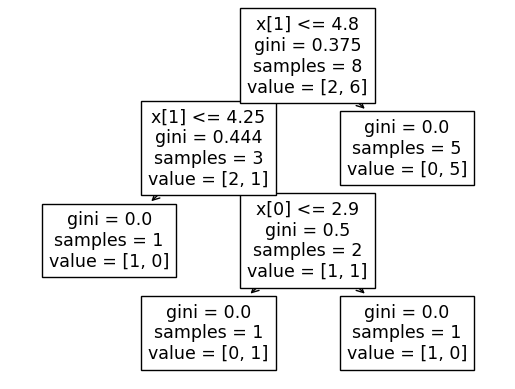

C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


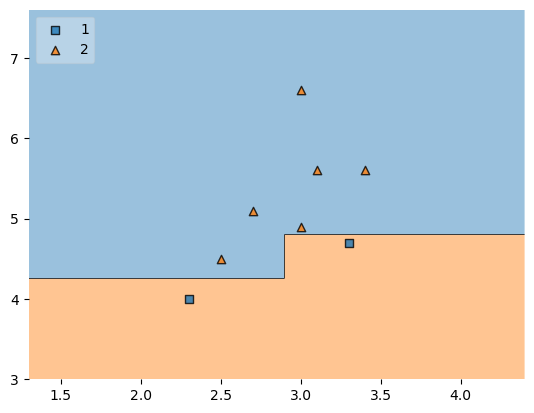

In [49]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [51]:
df_test

,sepal_width,petal_length,species
87,2.3,4.4,1
83,2.7,5.1,1
120,3.2,5.7,2
70,3.2,4.8,1
98,2.5,3.0,1
148,3.4,5.4,2
68,2.2,4.5,1
130,2.8,6.1,2
147,3.0,5.2,2
125,3.2,6.0,2


In [55]:
print('Predictor 1', dt_bag1.predict(np.array([2.3, 4.4]).reshape(1,2)))
print('Predictor 2', dt_bag2.predict(np.array([2.3, 4.4]).reshape(1,2)))
print('Predictor 3', dt_bag3.predict(np.array([2.3, 4.4]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
